In [1]:
import math
import numpy as np
import pandas as pd
from IPython.display import display
import plotly.express as px

In [2]:
x = np.linspace(0, 1, 1000, endpoint = False) * 2.0 * np.pi
y = np.sin(x)
y2 = np.cos(x)
df = pd.DataFrame({'x': x, 'sin': y, 'cos': y2})
display(df.head())

df_melted = df.melt(id_vars='x', var_name='fun', value_name='y')
display(df_melted.head())

,x,sin,cos
0,0.000000,0.000000,1.000000
1,0.006283,0.006283,0.999980
2,0.012566,0.012566,0.999921
3,0.018850,0.018848,0.999822
4,0.025133,0.025130,0.999684


,x,fun,y
0,0.000000,sin,0.000000
1,0.006283,sin,0.006283
2,0.012566,sin,0.012566
3,0.018850,sin,0.018848
4,0.025133,sin,0.025130


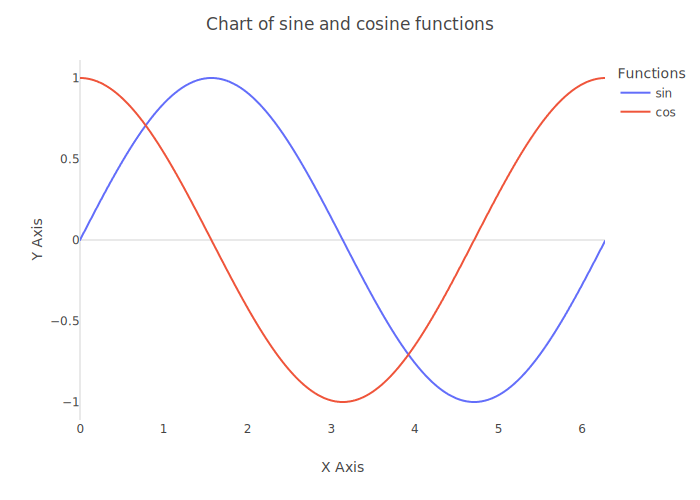

In [3]:
fig = px.line(df_melted
              , x="x"
              , y="y"
              , color='fun')

fig.update_layout(title='Chart of sine and cosine functions'
                  , legend_title="Functions"
                  , xaxis_title='X Axis'
                  , yaxis_title='Y Axis'
                  , template='none')

fig.update_xaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

In [4]:
# Default parameters: mean=0, standard_deviation=1
x = np.random.normal(loc=0, scale=1, size=10000)
df_normal = pd.DataFrame({'x': x})
display(df_normal.head())

,x
0,0.375880
1,1.556920
2,-0.034239
3,2.038351
4,-1.079925


In [5]:
N = len(x)
    
# Sturges' Rule
sturges = int(1 + 3.322 * np.log10(N))
print(sturges)

# Square Root Rule
sqrt = int(np.sqrt(N))
print(sqrt)

# Rice Rule
rice = int(2 * (N ** (1/3)))
print(rice)

14
100
43


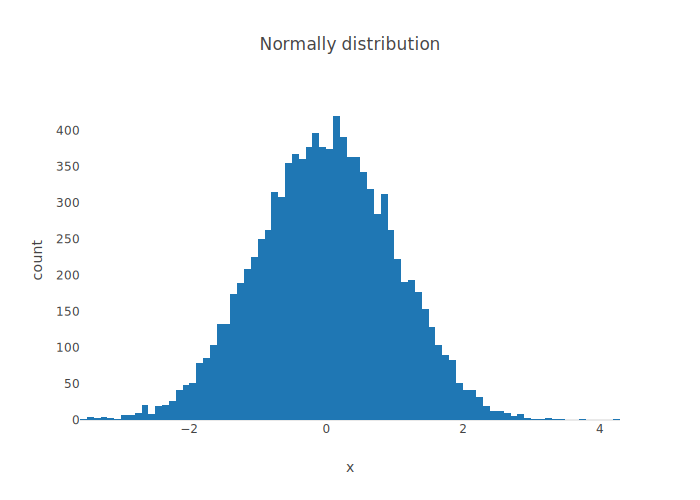

In [6]:
fig = px.histogram(
  df_normal
  , x="x"
  , nbins=sqrt
  , title="Normally distribution"
  , template='none'
)

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

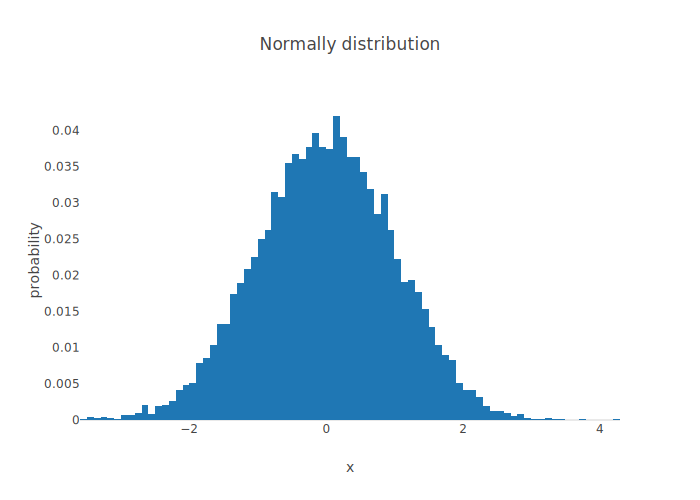

In [7]:
fig = px.histogram(
  df_normal
  , x="x"
  , nbins=sqrt
  , histnorm='probability'
  , title="Normally distribution"
  , template='none'
)

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

In [8]:
# Default parameters: mean=0, standard_deviation=1
x = np.random.normal(loc=0, scale=1, size=10000)
y = np.random.normal(loc=2, scale=1, size=10000)
df_normal = pd.DataFrame({'f1': x, 'f2': y})
display(df_normal.head())

df_melted = df_normal.melt(var_name='var', value_name='x')
display(df_melted.head())

,f1,f2
0,0.938640,3.010695
1,-1.108281,2.339519
2,-0.077939,2.153449
3,-0.335670,1.967835
4,0.895575,1.281172


,var,x
0,f1,0.938640
1,f1,-1.108281
2,f1,-0.077939
3,f1,-0.335670
4,f1,0.895575


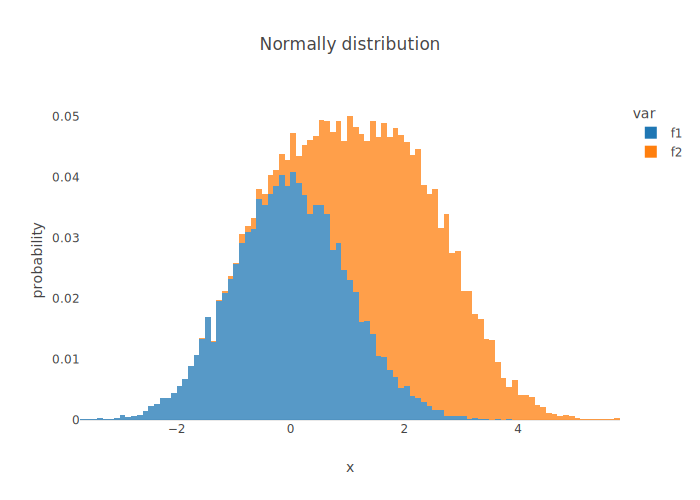

In [9]:
fig = px.histogram(
  df_melted
  , x="x"
  , color="var"
  , nbins=sqrt
  , histnorm='probability'
  , title="Normally distribution"
  , template='none'
  , opacity=0.75
)

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

In [10]:
df = px.data.gapminder()
display(df.head())

df_continent = df.groupby('continent', as_index = False, dropna = False).size().sort_values('size', ascending = False)
display(df_continent.head())

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


,continent,size
0,Africa,624
2,Asia,396
3,Europe,360
1,Americas,300
4,Oceania,24


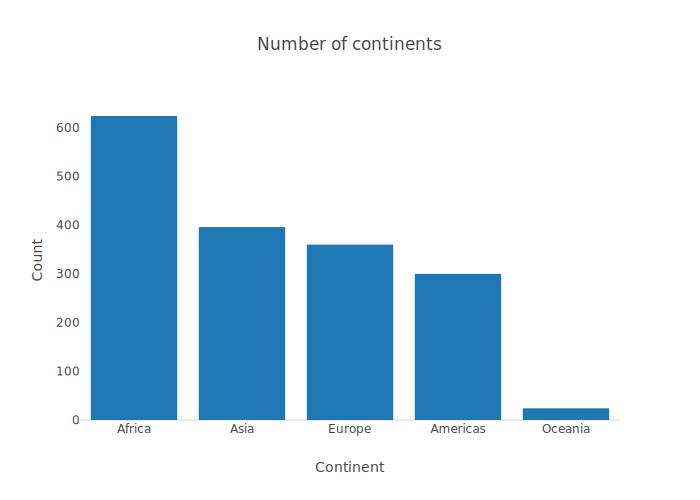

In [11]:
fig = px.bar(df_continent
             , x='continent'
             , y='size'
             , title="Number of continents"
             , labels={
                     "continent": "Continent",
                     "size": "Count"
                 }
             , template='none'
            )

fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

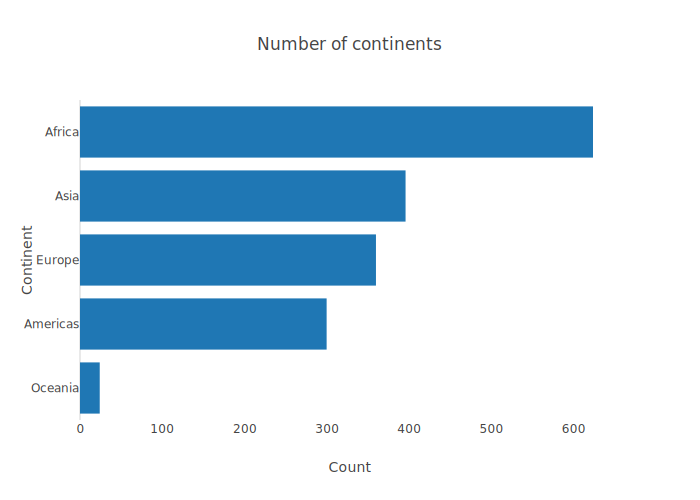

In [12]:
df_continent = df_continent.sort_values('size', ascending = True)

fig = px.bar(df_continent
             , x='size'
             , y='continent'
             , orientation='h'
             , title="Number of continents"
             , labels={
                     "continent": "Continent",
                     "size": "Count"
                 }
             , template='none'
            )

fig.update_xaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

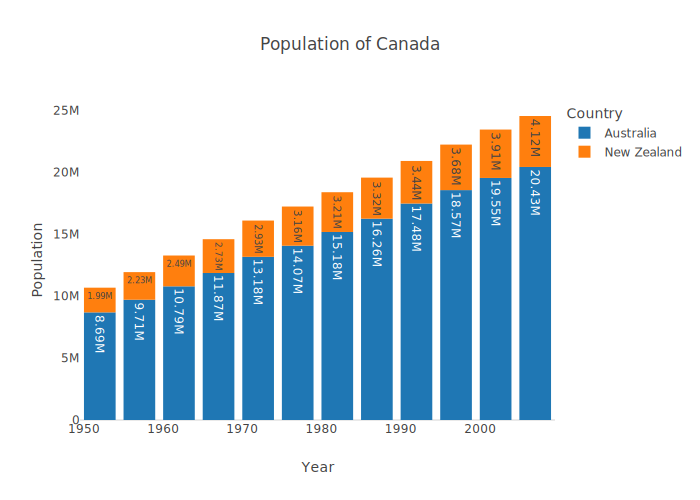

In [13]:
df_continent = px.data.gapminder().query("continent == 'Oceania'").sort_values('year')
df_continent['pop_m'] = df_continent['pop'] / 1_000_000
df_continent['pop_m_str'] = df_continent['pop_m'].round(2).astype(str) + "M"

fig = px.bar(df_continent
             , x='year'
             , y='pop'
             , title="Population of Canada"
             , labels={
                     "year": "Year",
                     "pop": "Population",
                     "country": "Country"
                 }
             , color='country'
             , text='pop_m_str'
             , template='none'
            )

fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

In [14]:
agg_pop = df_continent.groupby('year', as_index=False)['pop'].sum().rename(columns={"pop": "pop_total"})

df_continent_pop = df_continent.merge(agg_pop, on='year', how='inner')
df_continent_pop['pop_percent'] = df_continent_pop['pop'] / df_continent_pop['pop_total']

df_continent_pop['pop_percent_int'] = df_continent_pop['pop_percent'] * 100
df_continent_pop['pop_percent_str'] = df_continent_pop['pop_percent_int'].round(2).astype(str) + "%"

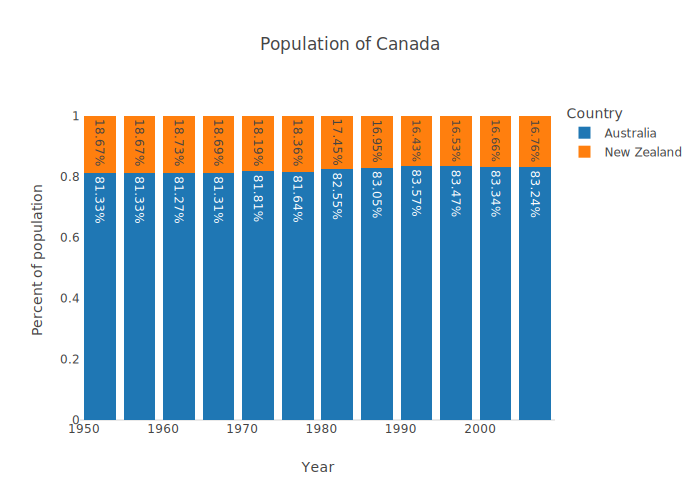

In [15]:
fig = px.bar(df_continent_pop
             , x='year'
             , y='pop_percent'
             , title="Population of Canada"
             , labels={
                     "year": "Year",
                     "pop_percent": "Percent of population",
                     "country": "Country"
                 }
             , color='country'
             , text='pop_percent_str'
             , barmode='stack'
             , template='none'
            )

fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

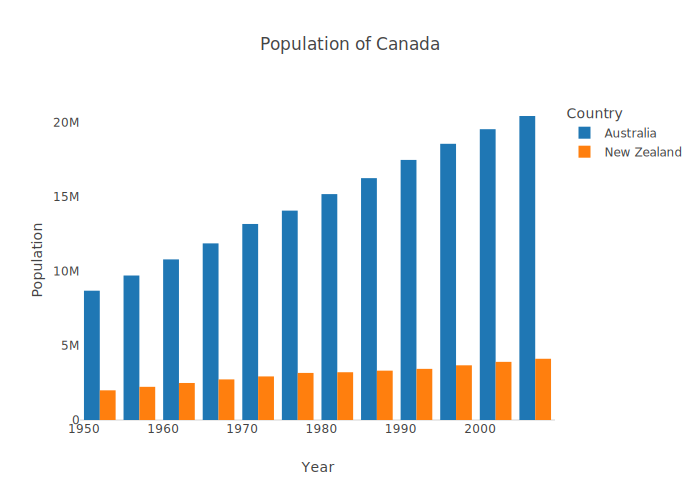

In [16]:
fig = px.bar(df_continent
             , x='year'
             , y='pop'
             , title="Population of Canada"
             , labels={
                     "year": "Year",
                     "pop": "Population",
                     "country": "Country"
                 }
             , color='country'
             , barmode="group"
             , template='none'
            )

fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=1, zerolinecolor='lightgray')

fig.show(renderer='svg')

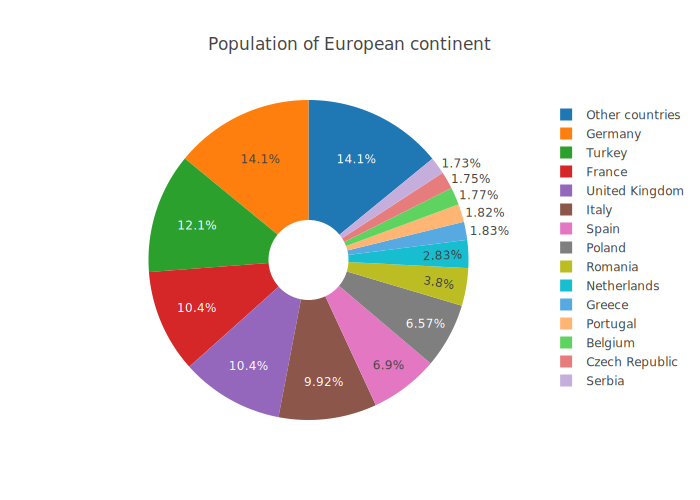

In [17]:
df_population = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df_population.loc[df['pop'] < 10_000_000, 'country'] = 'Other countries' # Represent only large countries

fig = px.pie(df_population
             , values='pop'
             , names='country'
             , title='Population of European continent'
             , template='none'
             , hole=0.25)

fig.show(renderer='svg')

In [18]:
x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 100, endpoint = False)
y_vals = np.linspace(-2 * np.pi, 2 * np.pi, 100, endpoint = False)

X, Y = np.meshgrid(x_vals, y_vals)
Z = np.sin(X) * np.cos(Y)
    
display(Z)

array([[ 2.44929360e-16,  1.25333234e-01,  2.48689887e-01, ...,
        -3.68124553e-01, -2.48689887e-01, -1.25333234e-01],
       [ 2.42998019e-16,  1.24344944e-01,  2.46728893e-01, ...,
        -3.65221781e-01, -2.46728893e-01, -1.24344944e-01],
       [ 2.37234454e-16,  1.21395660e-01,  2.40876837e-01, ...,
        -3.56559243e-01, -2.40876837e-01, -1.21395660e-01],
       ...,
       [ 2.27729559e-16,  1.16531893e-01,  2.31226009e-01, ...,
        -3.42273553e-01, -2.31226009e-01, -1.16531893e-01],
       [ 2.37234454e-16,  1.21395660e-01,  2.40876837e-01, ...,
        -3.56559243e-01, -2.40876837e-01, -1.21395660e-01],
       [ 2.42998019e-16,  1.24344944e-01,  2.46728893e-01, ...,
        -3.65221781e-01, -2.46728893e-01, -1.24344944e-01]])

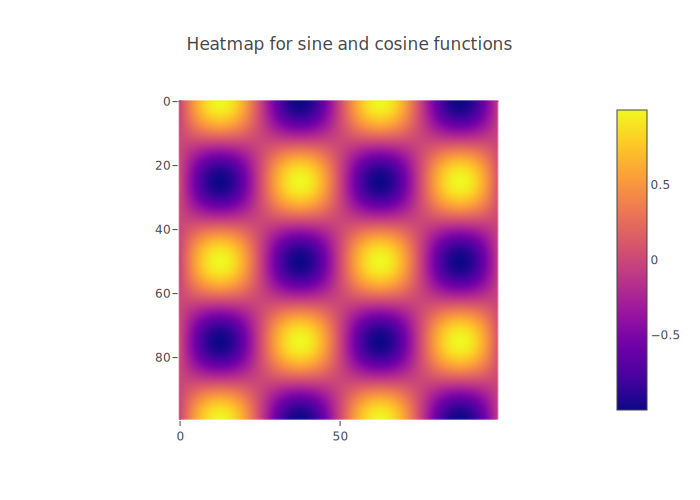

In [19]:
fig = px.imshow(Z
                , title='Heatmap for sine and cosine functions'
                , template='none'
                , color_continuous_scale='plasma'
                , text_auto=True)

fig.show(renderer='svg')